# UFC Match Analysis Match analysis in UFC historical dataset with EDA.

by M. Attala Rajafar

Data Kaggle : https://www.kaggle.com/RAJEEVW/UFCDATA

Latar Belakang

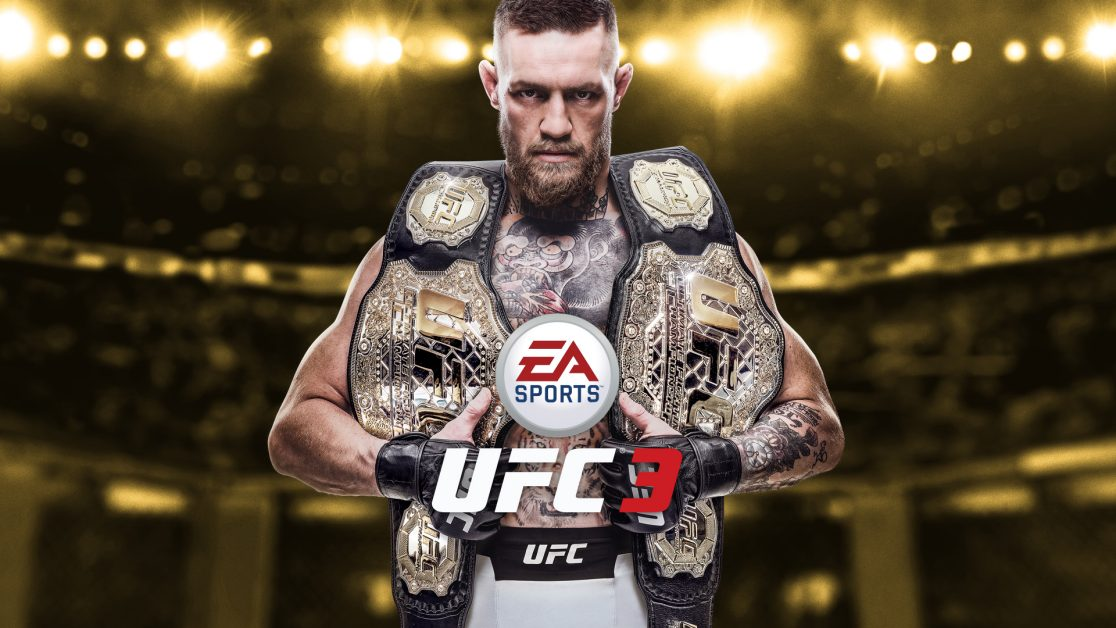

>Seni bela diri merupakan salah satu bentuk olah raga yang umum di masyarakat. Seiring berjalannya waktu, seni bela diri memiliki banyak sekali cabang. Mulai dari Tinju, Gulat, Silat, dan masih banyak lagi.

>Seni bela diri campuran atau Mixed Martial Art (MMA) merupakan salah satu cabang seni bela diri professional yang terdiri dari campuran bermacam-macam seni bela diri.

>Berdasarkan data yang kami peroleh, kami akan memaparkan beberapa saran untuk memperoleh kemenangan dalam seni bela diri campuran.







Glosarium



*   Red / Blue = Sisi mulai petarung yang dilambangkan dengan warna sarung tangan atau atribut lainnya dalam pertandingan
*   Fighter Appearence = Jumlah pertandingan yang telah dilakukan oleh atlit individu



## Acquisition

Library Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation

%matplotlib inline     
sns.set(color_codes=True)

Read Data

In [2]:
df = pd.read_csv("data.csv")
df.head(3)

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.0,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.5,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Columns: 144 entries, R_fighter to R_age
dtypes: bool(1), float64(106), int64(28), object(9)
memory usage: 6.6+ MB


Untuk mengetahui tipe data pada data anda dapat menggunakan code berikut:

In [4]:
df.dtypes

R_fighter        object
B_fighter        object
Referee          object
date             object
location         object
                 ...   
R_Height_cms    float64
R_Reach_cms     float64
R_Weight_lbs    float64
B_age           float64
R_age           float64
Length: 144, dtype: object

## Preprocessing

Menjatuhkan baris duplikat

Ini sering kali merupakan hal yang mudah dilakukan karena kumpulan data besar seperti dalam kasus ini berisi lebih dari 6.000 baris sering memiliki beberapa data duplikat yang mungkin mengganggu, jadi di sini saya menghapus semua nilai duplikat dari kumpulan data. Sebagai contoh sebelum menghapus saya memiliki 6012 baris data tetapi setelah dicek tidak ada data yang duplikat

In [5]:
df.shape

(6012, 144)

In [6]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 144)


In [7]:
print("Total", df.shape)
print("Dari code diatas dapat diartikan bahwa data memiliki total 6012 baris dan 144 fitur dari data ini.")

Total (6012, 144)
Dari code diatas dapat diartikan bahwa data memiliki total 6012 baris dan 144 fitur dari data ini.


In [8]:
df = df.drop_duplicates()

Dropping nilai yang hilang atau null.

Ini sebagian besar mirip dengan langkah sebelumnya tetapi di sini semua nilai yang hilang terdeteksi dan dibuang kemudian. Sekarang, ini bukan pendekatan yang baik untuk melakukannya, karena banyak orang hanya mengganti nilai yang hilang dengan rata-rata atau rata-rata kolom itu, tetapi dalam kasus ini, saya hanya menjatuhkan nilai yang hilang itu. Ini karena ada banyak nilai yang hilang dibandingkan dengan nilai 6.000, ini adalah angka yang lumayan banyak. Maka harus dilakukan proses dropping data nul

In [9]:
print(df.isnull().sum())

R_fighter         0
B_fighter         0
Referee          32
date              0
location          0
               ... 
R_Height_cms      4
R_Reach_cms     406
R_Weight_lbs      2
B_age           172
R_age            63
Length: 144, dtype: int64


In [10]:
df = df.dropna()    # Dropping the missing values.

In [11]:
print(df.isnull().sum())   # After dropping the values

R_fighter       0
B_fighter       0
Referee         0
date            0
location        0
               ..
R_Height_cms    0
R_Reach_cms     0
R_Weight_lbs    0
B_age           0
R_age           0
Length: 144, dtype: int64


Mengganti nama kolom

Dalam contoh ini, sebagian besar nama kolom sangat membingungkan untuk dibaca, jadi saya hanya mengubah nama kolom mereka. Ini adalah pendekatan yang baik untuk meningkatkan keterbacaan set data.

In [12]:
df = df.rename(columns={"title_bout": "title_fight"})
df.head(3)

,R_fighter,B_fighter,Referee,date,location,Winner,title_fight,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


## Descriptive

Five sumary

In [13]:
df.describe()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,...,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,...,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000
mean,0.264178,0.172082,0.454907,0.427802,0.295177,0.257016,0.468482,0.378010,0.154440,0.135488,...,0.406427,1.674036,1.711568,1.022622,0.084319,178.754622,183.605434,168.642416,29.824165,30.231877
std,0.382721,0.307015,0.120214,0.121733,0.263668,0.250097,0.698174,0.597222,0.328035,0.304807,...,0.690165,1.829776,2.052185,1.517195,0.300998,8.901029,10.697950,34.258023,4.019934,4.156208
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,152.400000,152.400000,115.000000,20.000000,19.000000
25%,0.000000,0.000000,0.380000,0.350000,0.051914,0.041250,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,172.720000,177.800000,145.000000,27.000000,27.000000
50%,0.062500,0.000000,0.450000,0.420929,0.250000,0.197063,0.171875,0.090332,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,180.340000,182.880000,170.000000,30.000000,30.000000
75%,0.500000,0.250000,0.525625,0.500000,0.500000,0.398499,0.694702,0.500000,0.128906,0.125000,...,1.000000,2.000000,3.000000,2.000000,0.000000,185.420000,190.500000,185.000000,32.000000,33.000000
max,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,8.000000,7.000000,3.000000,3.000000,...,5.000000,10.000000,11.000000,13.000000,2.000000,210.820000,213.360000,265.000000,47.000000,46.000000


In [14]:
df.median()

title_fight                0.000000
B_avg_KD                   0.062500
B_avg_opp_KD               0.000000
B_avg_SIG_STR_pct          0.450000
B_avg_opp_SIG_STR_pct      0.420929
                            ...    
R_Height_cms             180.340000
R_Reach_cms              182.880000
R_Weight_lbs             170.000000
B_age                     30.000000
R_age                     30.000000
Length: 135, dtype: float64

In [15]:
df.mean()

title_fight                0.064010
B_avg_KD                   0.264178
B_avg_opp_KD               0.172082
B_avg_SIG_STR_pct          0.454907
B_avg_opp_SIG_STR_pct      0.427802
                            ...    
R_Height_cms             178.754622
R_Reach_cms              183.605434
R_Weight_lbs             168.642416
B_age                     29.824165
R_age                     30.231877
Length: 135, dtype: float64

In [16]:
df["R_fighter"].mode()

0    Jim Miller
dtype: object

In [17]:
df["B_fighter"].mode()

0    Charles Oliveira
1     Jeremy Stephens
dtype: object

In [18]:
df.min()

R_fighter                                   Aaron Phillips
B_fighter                                   Aaron Phillips
Referee                                       Adam Cheadle
date                                            1997-10-17
location        Abu Dhabi, Abu Dhabi, United Arab Emirates
                                   ...                    
R_Height_cms                                         152.4
R_Reach_cms                                          152.4
R_Weight_lbs                                         115.0
B_age                                                 20.0
R_age                                                 19.0
Length: 144, dtype: object

### Box Plot

Outliers/Pencilan adalah titik atau kumpulan poin yang berbeda dari poin lainnya. Terkadang mereka bisa sangat tinggi atau sangat rendah. Sering kali ide yang baik untuk mendeteksi dan menghapus pencilan. Karena pencilan adalah salah satu alasan utama untuk menghasilkan model yang kurang akurat. Oleh karena itu ide yang baik untuk menghapusnya. Deteksi outlier dan menghilangkan yang akan saya lakukan disebut teknik skor IQR. Seringkali outlier dapat dilihat dengan visualisasi menggunakan plot kotak.


IQR adalah interquartile range atau rentang akar kuartil dari sekumpulan data. IQR digunakan dalam analisis statistik untuk membantu menarik kesimpulan mengenai sekumpulan data. IQR lebih sering digunakan daripada range karena IQR tidak menyertakan data paling luar. 

<AxesSubplot:xlabel='B_age'>

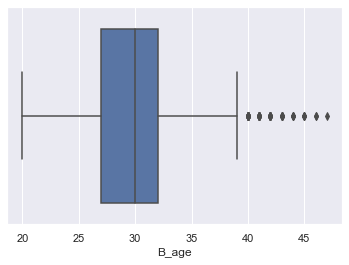

In [19]:
sns.boxplot(x=df['B_age'])

<AxesSubplot:xlabel='R_age'>

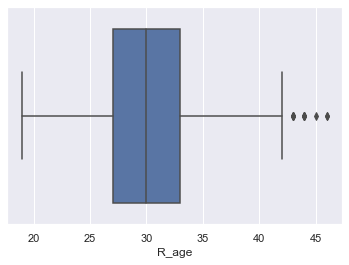

In [20]:
sns.boxplot(x=df['R_age'])

In [21]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

title_fight               0.000000
B_avg_KD                  0.500000
B_avg_opp_KD              0.250000
B_avg_SIG_STR_pct         0.145625
B_avg_opp_SIG_STR_pct     0.150000
                           ...    
R_Height_cms             12.700000
R_Reach_cms              12.700000
R_Weight_lbs             40.000000
B_age                     5.000000
R_age                     6.000000
Length: 135, dtype: float64


### Histogram

Histogram mengacu pada frekuensi kemunculan variabel dalam suatu interval. Dalam hal ini, ada terutama 10 jenis perusahaan manufaktur mobil, tetapi seringkali penting untuk mengetahui siapa yang memiliki jumlah mobil terbanyak. Untuk melakukan histogram ini adalah salah satu solusi sepele yang memungkinkan kita mengetahui jumlah total mobil yang diproduksi oleh perusahaan yang berbeda.

##Data Jumlah Pertandingan Setiap Atlit

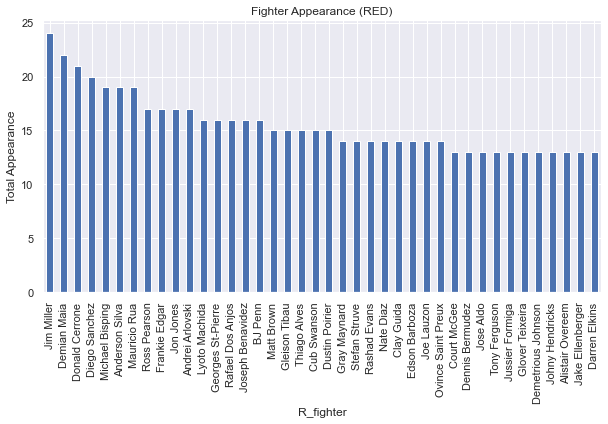

In [22]:
df.R_fighter.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Fighter Appearance (RED)")
plt.xlabel('R_fighter')
plt.ylabel('Total Appearance');

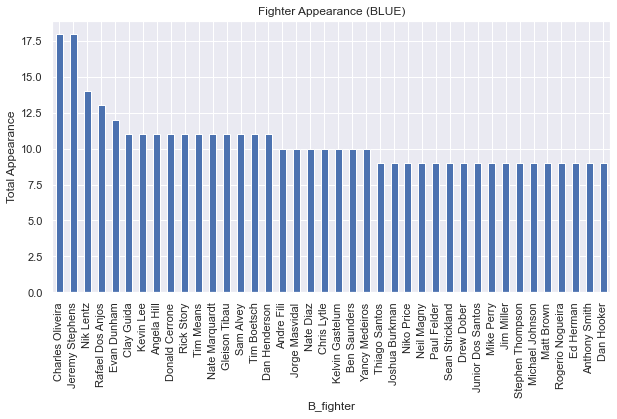

In [23]:
df.B_fighter.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Fighter Appearance (BLUE)")
plt.xlabel('B_fighter')
plt.ylabel('Total Appearance');

## Visualization

### Scatter Plot

Kita biasanya menggunakan plot pencar untuk menemukan korelasi antara dua variabel. Di sini plot pencar diplot antara Horsepower dan Price dan kita dapat melihat plot di bawah ini. Dengan plot yang diberikan di bawah ini, kita dapat dengan mudah menggambar garis tren. Fitur-fitur ini menyediakan penyebaran poin yang baik.

**Apakah menyerang kaki merupakan strategi yang baik?**

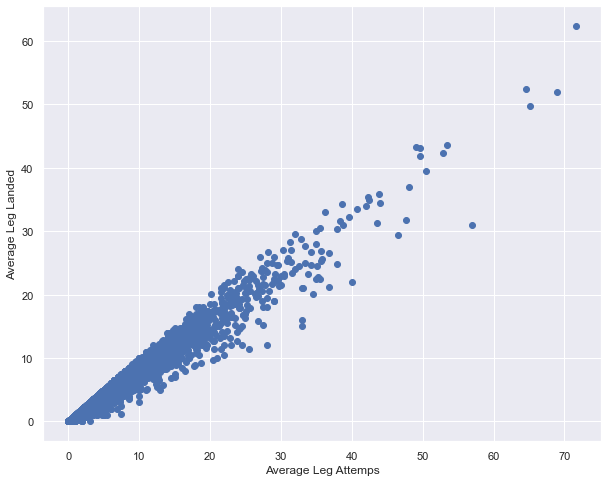

In [24]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(df['R_avg_LEG_att'], df['R_avg_LEG_landed'])
ax.set_xlabel('Average Leg Attemps')
ax.set_ylabel('Average Leg Landed')
plt.show()

Berdasarkan data diatas, dapat dilihat bahwa menyerang kaki merupakan strategi yang cukup umum dan memiliki kemungkinan hit yang cukup tinggi, namun perlu diperhatikan agar tidak terlalu fokus terhadap kaki melainkan tindakan selanjutnya ketika kaki lawan sudah dilumpuhkan.

**Apakah Menyerang dengan Pukulan adalah Cara Efektif Melumpuhkan Lawan?**

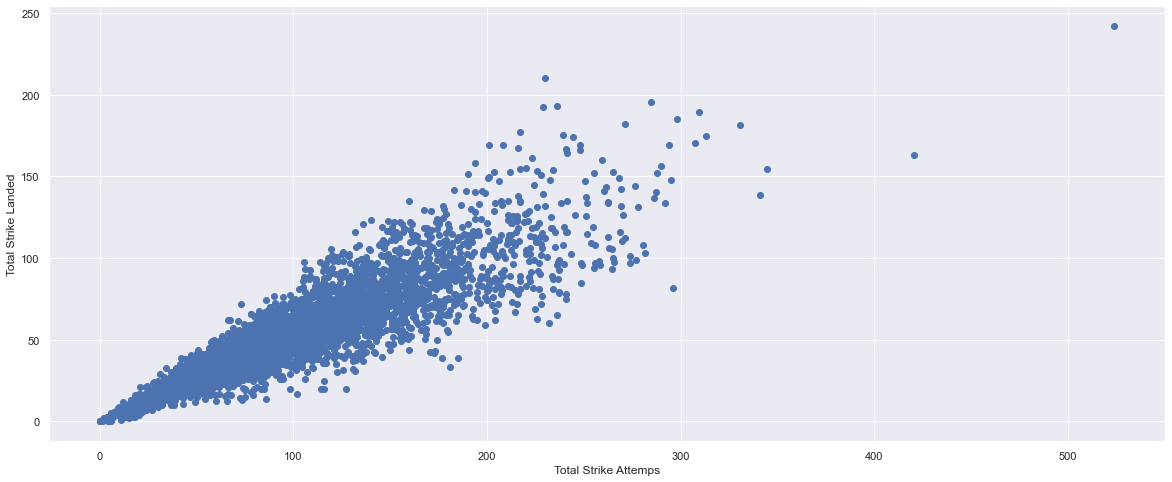

In [25]:
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(df['B_avg_TOTAL_STR_att'], df['B_avg_TOTAL_STR_landed'])
ax.set_xlabel('Total Strike Attemps')
ax.set_ylabel('Total Strike Landed')
plt.show()

Berdasarkan data yang kami peroleh, dapat dilihat bahwa memukul adalah strategi yang baik selama mengingat bahwa pukulan yang dilakukan yakin mengenai target. Pukulan pun tidak dilakukan secara berulang karena dapat mengakibatkan penurunan poin dikarenakan rasio pukulan yang lancarkan diatas 75-100 kali dengan pukulan yang kena memiliki kemungkinan kurang dari 50% mengenai target.

### Bar Chart

In [26]:
# Define Function

def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

**Apakah Stance Berpengaruh Terhadap Kemenangan?**

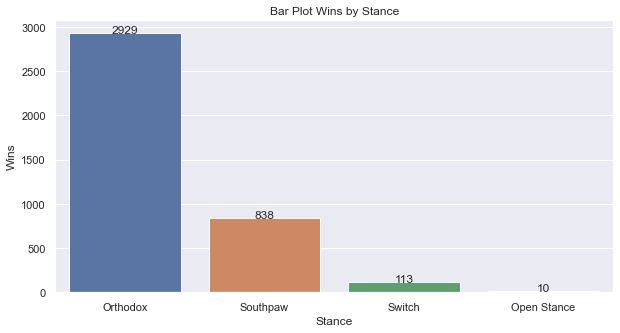

In [27]:
dataBaru = df["R_Stance"].unique()
data = []

for c in dataBaru:
    d = df[df["R_Stance"] == c]
    counts = d["R_wins"].count()
    data.append([c, counts])
    
dt = pd.DataFrame(data, columns = ["Stance", "Wins"])

plt.figure(figsize=(10,5))
plt.title("Bar Plot Wins by Stance")

ax = sns.barplot(x="Stance", y="Wins", data=dt)
        
show_values_on_bars(ax, "v", 0.10)

Berdasarkan data yang kami peroleh, stance orthodox adalah stance yang paling mungkin untuk memperoleh kemenangan. Hal ini dikarenakan stance ini memposisikan tangan melindungi kepala dan perut atlit tanpa mengurangi mobilitas tangan ketika akan digunakan untuk menyerang.

**Apakah Knock Down adalah Strategi yang Umum Digunakan?**

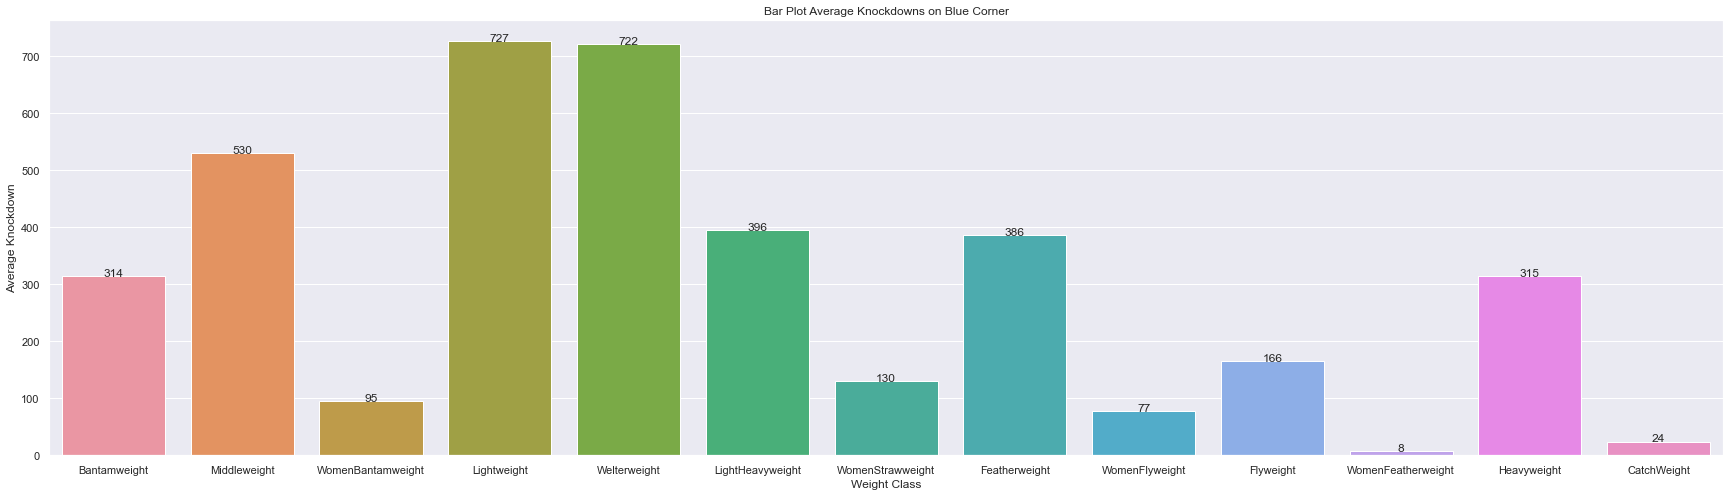

In [28]:
dataBaru = df["weight_class"].unique()
data = []

for c in dataBaru:
    d = df[df["weight_class"] == c]
    counts = d["B_avg_KD"].count()
    data.append([c, counts])
    
dt = pd.DataFrame(data, columns = ["Weight Class", "Average Knockdown"])

plt.figure(figsize=(30,8))
plt.title("Bar Plot Average Knockdowns on Blue Corner")

ax = sns.barplot(x="Weight Class", y="Average Knockdown", data=dt)
        
show_values_on_bars(ax, "v", 0.10)

Berdasar data yang kami peroleh, knockdown lebih populer di kalangan kelas Light Weight dan Welter Weight. Hal ini dikarenakan pada kelas tersebut petarung memiliki postur badan yang relatif kecil, sehingga menghindari pukulan sangatlah mudah. Petarung lebih fokus ke menjatuhkan lawan ke matras dan melakukan submission untuk meraih kemenagan. Lain halnya ketika memasuki kelas berat. Karena postur tubuh yang besar, petarung kelas berat susah untuk melakukan knock down sehingga kebanyakan melancarkan pukulan bertubi-tubi untuk menjatuhkan lawan.

**Apakah Warna Sisi Petarung Mempengaruhi Kemenangan?**

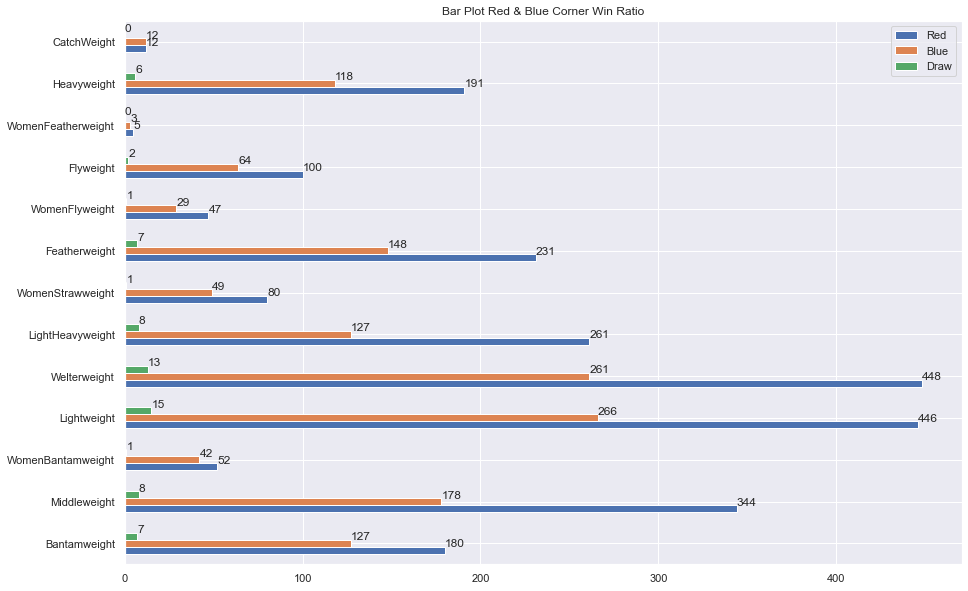

In [29]:
dataBaru = df["weight_class"].unique()
data = []

for c in dataBaru:
    d = df[df["weight_class"] == c]
    Private_room = d["Winner"].str.count("Red").sum()
    Entire_home = d["Winner"].str.count("Blue").sum()
    Shared_room = d["Winner"].str.count("Draw").sum()
    data.append([c, Private_room, Entire_home, Shared_room])

dt = pd.DataFrame(data, columns = ["Winner", "Red", "Blue", "Draw"])
dtBaru = []
dtPrivate = []
dtEntire = []
dtShared = []

for h in dt["Winner"]:
    dtBaru.append(h)

for j in dt["Red"]:
    dtPrivate.append(j)
    
for q in dt["Blue"]:
    dtEntire.append(q)

for r in dt["Draw"]:
    dtShared.append(r)

dts = pd.DataFrame({'Red': dtPrivate, 'Blue': dtEntire, 'Draw' : dtShared}, index = dtBaru)
ax = dts.plot.barh(figsize=(15,10), title="Bar Plot Red & Blue Corner Win Ratio")
        
show_values_on_bars(ax, "h", 0.10)


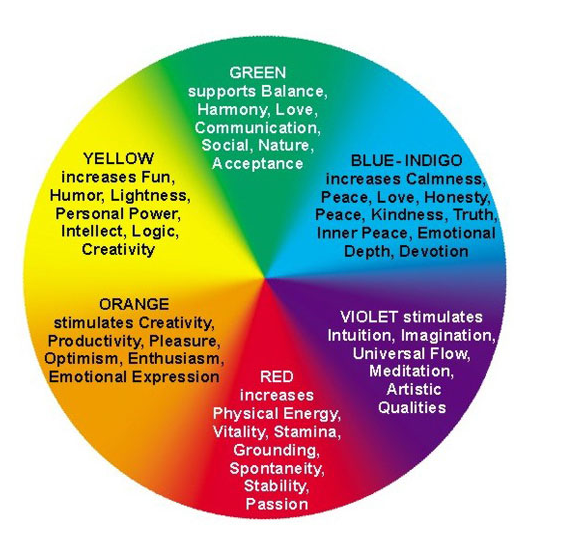

Berdasarkan data yang kami kumpulkan, pemain di sisi merah atau red memperoleh kemenangan jauh lebih banyak dari sisi biru atau blue. Hal ini tidak dikarenakan tempat karena arena UFC/MMA berbentuk octagon sehingga semua sisi sama adil. Menurut kami, hal ini disebabkan dari sisi psikologi dimana pemain dengan warna merah mendominasi lawan dengan warna tersebut. Berdasarkan studi oleh Cassidy Williams dari Sanford University (2017), warna merah menonjolkan kekuatan fisik dan keberanian. Hal ini terjadi di alam bawah sadar lawan sehingga termanipulasi dan di dominasi oleh petarung yang memegang warna merah.

**Pada Kelas Mana Paling Banyak Terjadi Pertarungan Gelar?**

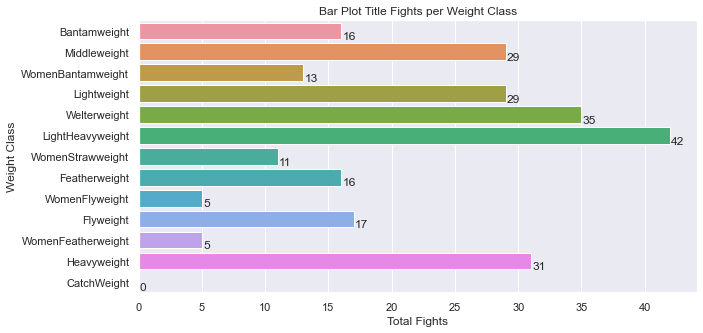

In [30]:
data = []

dataDistrik = df["weight_class"].unique()
for c in dataDistrik:
    d = df[df["weight_class"] == c]
    counts = d["title_fight"].sum()
    data.append([c, counts])

data = pd.DataFrame(data, columns = ["Weight Class", "Total Fights"])
get = data.head(15);

plt.figure(figsize=(10,5))
plt.title("Bar Plot Title Fights per Weight Class")

ax = sns.barplot(x="Total Fights", y="Weight Class", data=get)
        
show_values_on_bars(ax, "h", 0.10)

Dari data yang kami peroleh, kelas light heavy weight adalah kelas yang paling sering terjadi pertarungan gelar. Hal ini mungkin disebabkan oleh banyaknya petarung amatir yang baru masuk professional di kelas Light Heavy Weight sehingga sering sekali terjadi pertandingan gelar.

### Pie Chart

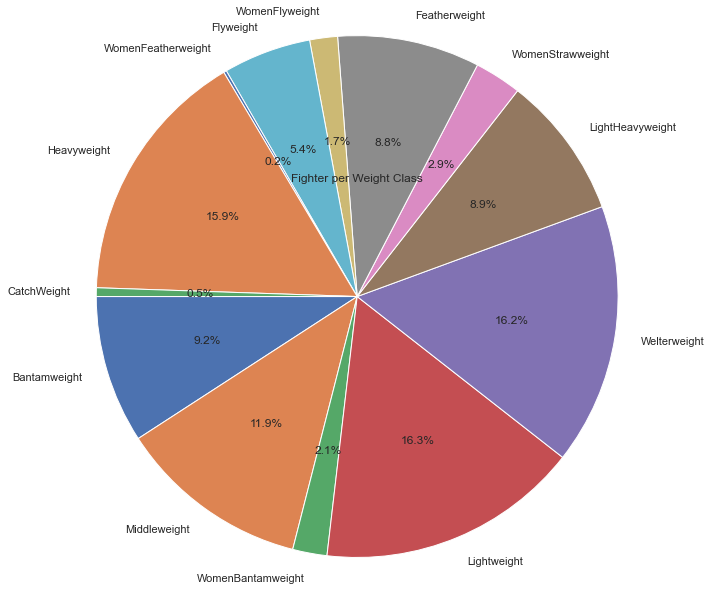

In [31]:
dataRoom = df["weight_class"].unique()
data = [];

for s in dataRoom:
    tot = df["weight_class"].str.count(s).sum()
    data.append([s, tot])

data = pd.DataFrame(data, columns = ["Weight Class", "Total"])

value = data["Total"]
labels = data["Weight Class"]

ax = plt.title("Fighter per Weight Class")
plt.pie(value, labels = labels, autopct = "%1.1f%%", radius=3, startangle=180)
#plt.axes().set_aspect("equal")
plt.show()

Dari data yang diperoleh, kebanyakan petarung datang dari kelas Heavy Weight, Bantam Weight, kemudian Welter Weight. Bantam Weight adalah kelas amatir dimana petarung biasa berlatih dasar dalam MMA di kelas ini. Welter Weight adalah kelas menengah dan biasa di duduki oleh petarung yang ingin meniti karir professional di dalam UFC. Sedangkan Heavyweight adalah kelas berat yang kerap kali duduki oleh professional UFC Fighter yang sudah memiliki nama.

### Line chart

**Apakah Stance Berpengaruh Terhadap Jumlah Clinch Petarung?**

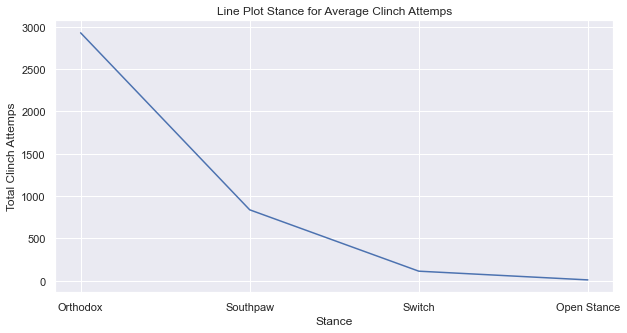

In [32]:
dataHost = df["R_Stance"].unique()
data = []

for c in dataHost:
    d = df[df["R_Stance"] == c]
    counts = d["R_avg_CLINCH_att"].count()
    data.append([c, counts])

data = pd.DataFrame(data, columns = ["Stance", "Total Clinch Attemps"])
plt.figure(figsize=(10,5))
plt.title("Line Plot Stance for Average Clinch Attemps")
ax = sns.lineplot(x="Stance", y="Total Clinch Attemps", data=data)

Berdasarkan data yang kami peroleh, clinch banyak diakukan oleh petarung orthodox karena kebanyakan petarung tidak menduga arah datang pukulan dari stance lawan sehingga mereka harus mengunci lawan untuk meminimalisir pukulan yang diterima.

**Apakah Kelas Petarung Mempengaruhi Jumlah Submission yang Dilakukan?**

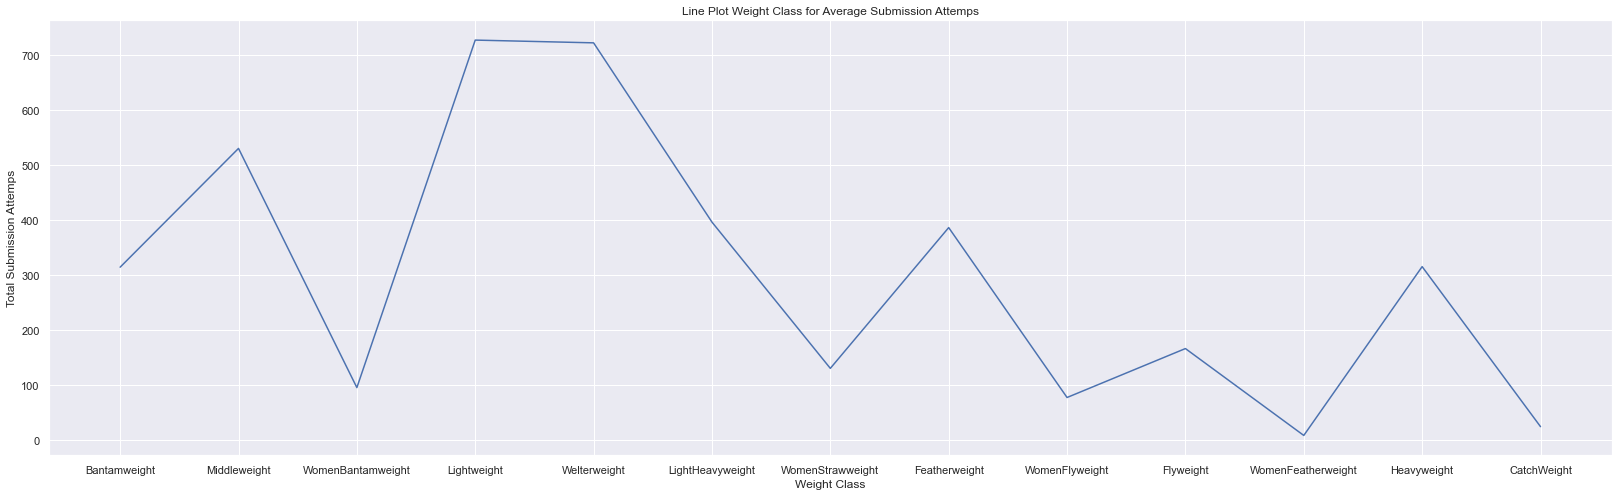

In [33]:
dataHost = df["weight_class"].unique()
data = []

for c in dataHost:
    d = df[df["weight_class"] == c]
    counts = d["B_avg_SUB_ATT"].count()
    data.append([c, counts])

data = pd.DataFrame(data, columns = ["Weight Class", "Total Submission Attemps"])
plt.figure(figsize=(28,8))
plt.title("Line Plot Weight Class for Average Submission Attemps")
ax = sns.lineplot(x="Weight Class", y="Total Submission Attemps", data=data)

Berdasarkan data yang didapat, pemain kelas bulu sampai dengan menengah lebih memilih untuk melakukan submission. Hal ini dikarenakan kelincahan dari pemain dengan postur tubuh kecil untuk menghindari pukulan, sehingga cara paling baik untuk menang adalah dengan mengunci lawan hingga menyerah.

### Heatmap

Text(0.5, 1.0, 'Correlation between Knockdown & Body part hit')

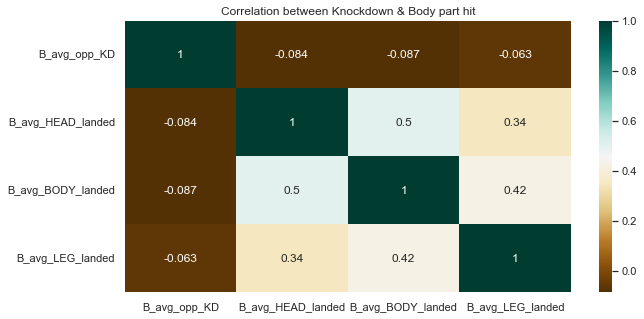

In [34]:
plt.figure(figsize=(10,5))
c = df[["B_avg_opp_KD","B_avg_HEAD_landed","B_avg_BODY_landed","B_avg_LEG_landed"]].corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

plt.title("Correlation between Knockdown & Body part hit")